<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


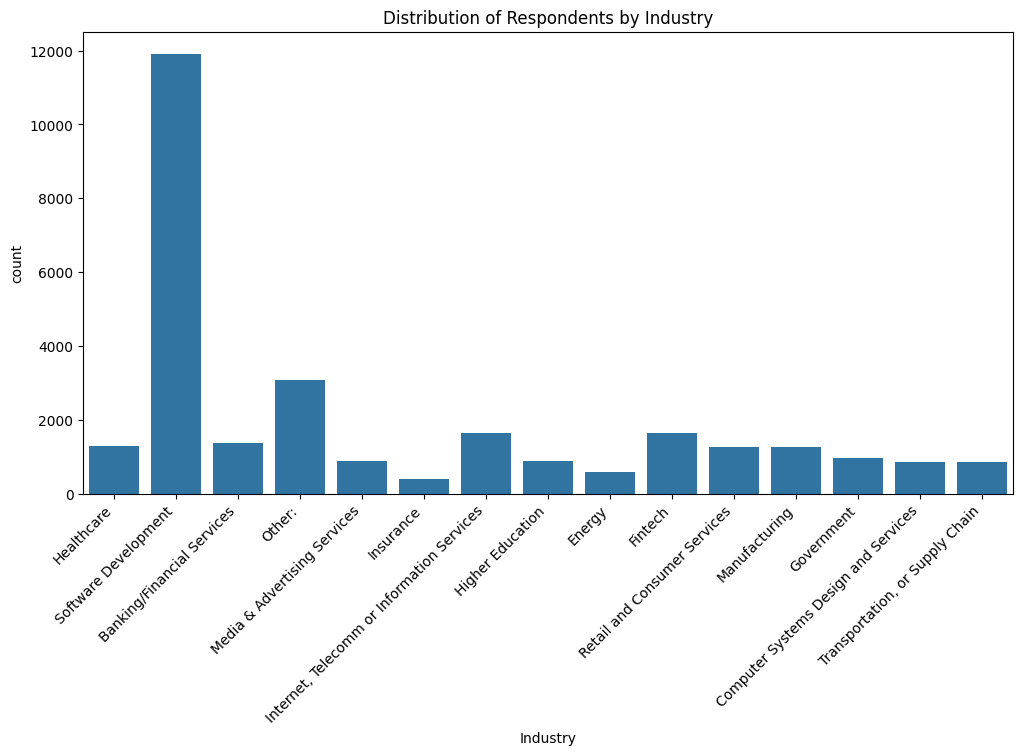

In [3]:
##Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a bar chart showing the distribution of respondents by industry
sns.countplot(data=df, x='Industry')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add a title to the plot
plt.title('Distribution of Respondents by Industry')

# Display the plot
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:


# Step 1: Calculate basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

# Step 2: Define the outlier threshold (mean + 3 * standard deviation)
threshold = mean_comp + 3 * std_comp
print(f"Outlier Threshold: {threshold:.2f}")

# Step 3: Identify outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

# Step 4: Count the number of outliers
num_outliers = outliers.shape[0]
print(f"Number of Outliers: {num_outliers}")

# Optional: Display the outliers for inspection
print("\nOutliers in ConvertedCompYearly:")
print(outliers[['ConvertedCompYearly']])

Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97
Outlier Threshold: 646426.21
Number of Outliers: 89

Outliers in ConvertedCompYearly:
       ConvertedCompYearly
529               650000.0
828              1000000.0
1932              945000.0
2171              750000.0
2187             2000000.0
...                    ...
38219            1000000.0
39643            1300000.0
40066             800000.0
40952             750000.0
41027             700000.0

[89 rows x 1 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


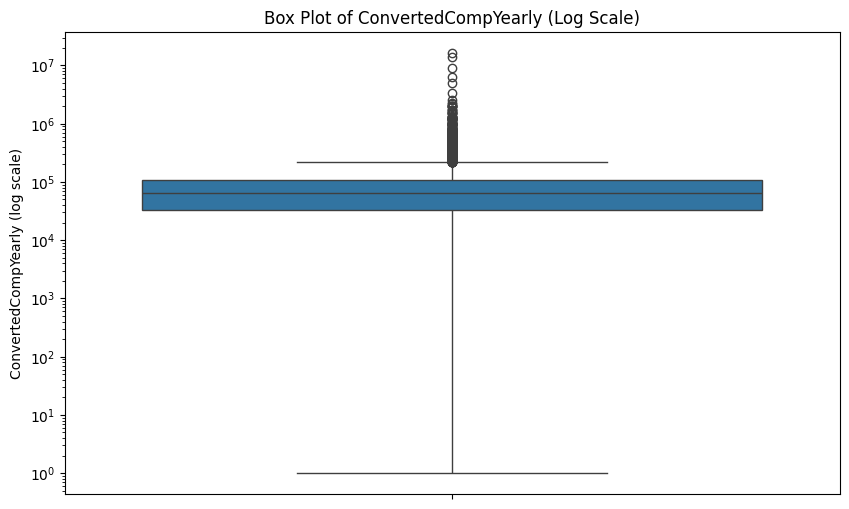

In [8]:

# Check if all values are positive
min_value = df['ConvertedCompYearly'].min()
if min_value <= 0:
    print(f"Warning: Data contains non-positive values (min: {min_value}). Log scale needs adjustment.")
else:
    # Create the box plot
    plt.figure(figsize=(10, 6))  # Set figure size for better visibility
    sns.boxplot(data=df, y='ConvertedCompYearly')
    
    # Apply logarithmic scale to the y-axis
    plt.yscale('log')
    
    # Add title and labels
    plt.title('Box Plot of ConvertedCompYearly (Log Scale)')
    plt.ylabel('ConvertedCompYearly (log scale)')
    
    # Display the plot
    plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [9]:


# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 5: Check the size of the original and new DataFrames
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]
outliers_removed = original_size - new_size

# Print results for validation
print(f"Original DataFrame size: {original_size}")
print(f"New DataFrame size: {new_size}")
print(f"Number of outliers removed: {outliers_removed}")

Original DataFrame size: 65437
New DataFrame size: 22457
Number of outliers removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


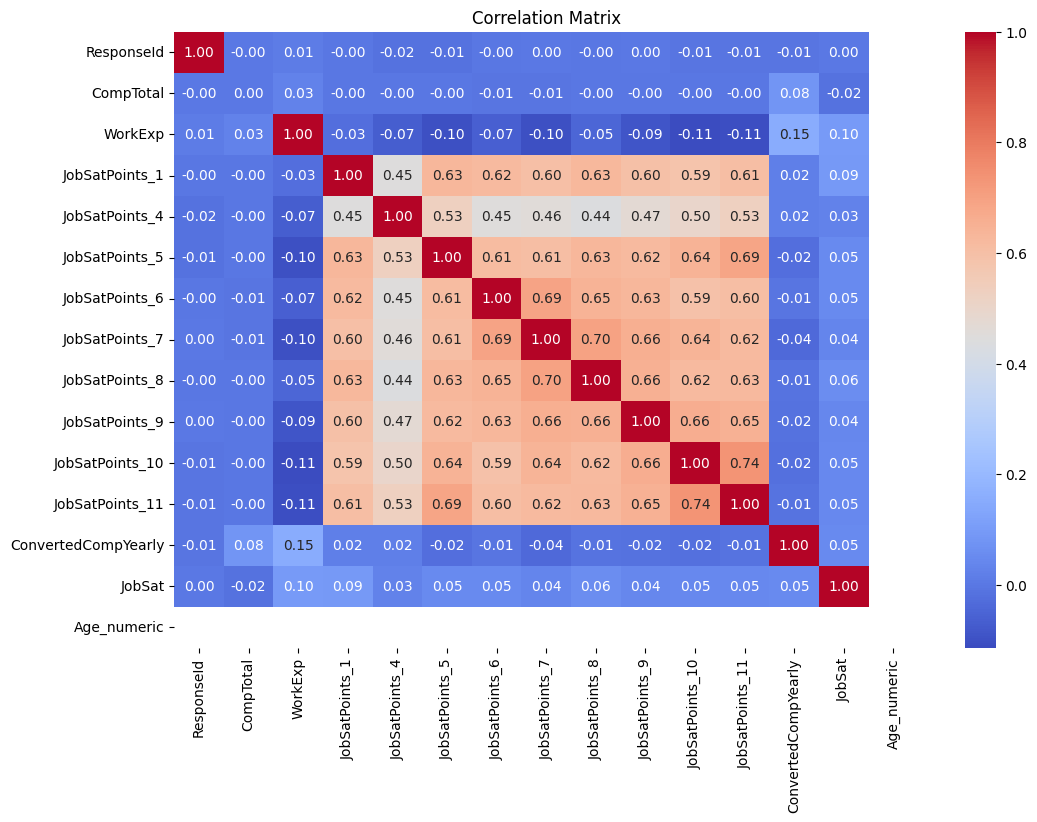

In [10]:


# Map the 'Age' column to approximate numeric values
# Define a dictionary to map age categories to their midpoints
age_mapping = {
    'Under 18': 16,  # Assuming a lower bound, e.g., 16 for "Under 18"
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70  # Assuming an upper bound, e.g., 70 for "65 or older"
}

# Create a new column 'Age_numeric' with the mapped values
df['Age_numeric'] = df['Age'].map(age_mapping)

# Select numerical columns, including 'Age_numeric'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
